# Stylized facts

*November 9 2022*

We now apply what we learned and calculate aggregate statistics for a number of empirical networks. We will see that we can use those to characterize (and categorize) large networks, and to reason about potential mechanisms that have shaped their evolution.

In [7]:
import pathpy as pp

import seaborn as sns
import matplotlib.pyplot as plt

from constants import ROOT_DIR

plt.style.use('default')
sns.set_style("whitegrid")

In [8]:
n_gentoo = pp.io.sql.read_network(f'{ROOT_DIR}/data/networks.db', sql='SELECT source, target FROM gentoo', directed=False)
n_highschool = pp.io.sql.read_network(f'{ROOT_DIR}/data/networks.db', sql='SELECT source, target FROM highschool', directed=False)
n_physicians = pp.io.sql.read_network(f'{ROOT_DIR}/data/networks.db', sql='SELECT source, target FROM physicians', directed=False)

[11-16 18:40:22: WARNING] 154 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.
[11-16 18:40:22: WARNING] 175 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.


In [9]:
def aggregate_statistics(network):
    print('n   = {0}'.format(network.number_of_nodes()))
    print('m   = {0}'.format(network.number_of_edges()))
    print('D   = {0}'.format(pp.algorithms.diameter(network.largest_connected_component())))
    print('<l> = {0}'.format(pp.algorithms.avg_path_length(network.largest_connected_component())))
    print('<k> = {0}'.format(pp.statistics.mean_degree(network)))
    print('r   = {0}'.format(pp.statistics.degree_assortativity(network)))
    print('C   = {0}'.format(network.avg_clustering_coefficient()))
    sns.distplot(pp.statistics.degree_sequence(network))

The first network is a directed communication and collaboration network, which has a small clustering coefficient.

n   = 403
m   = 513
D   = 8.0
<l> = 3.1096379146451367
<k> = 2.5459057071960296
r   = -0.3455778547630484
C   = 0.017357355654577633


/home/user/PycharmProjects/SNA/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


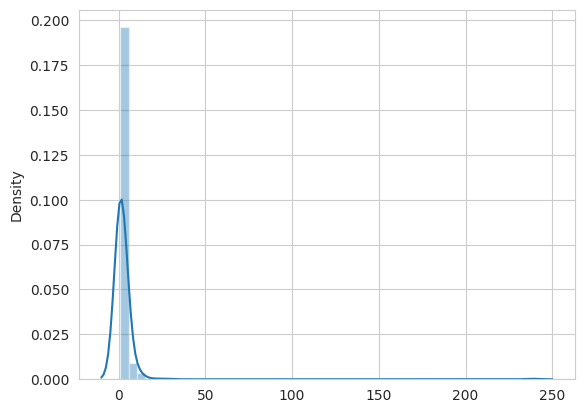

In [10]:
aggregate_statistics(n_gentoo)

The other two networks are undirected social networks, for which we expect a large clustering coefficient. The reason for this is that two friends of a person a likely to be friend with each other as well:

n   = 120
m   = 348
D   = 12.0
<l> = 5.362745098039215
<k> = 5.8
r   = 0.15610160398496567
C   = 0.446799543049543


/home/user/PycharmProjects/SNA/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


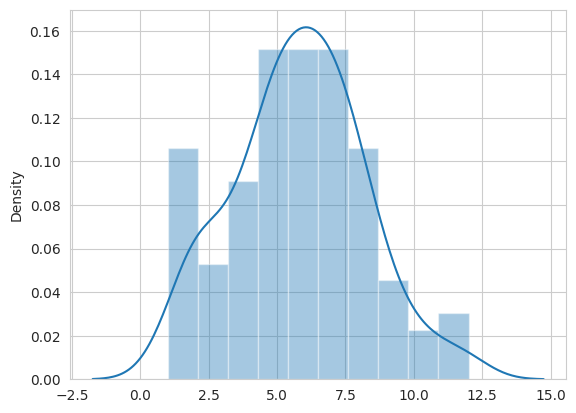

In [11]:
aggregate_statistics(n_highschool)

n   = 241
m   = 923
D   = 5.0
<l> = 2.5870910698496905
<k> = 7.659751037344399
r   = -0.05582911431431488
C   = 0.3115751356464073


/home/user/PycharmProjects/SNA/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


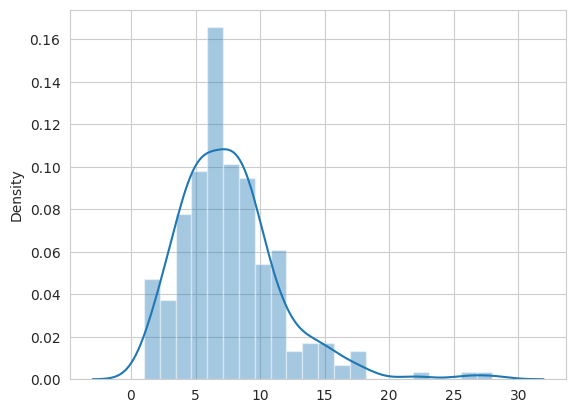

In [12]:
aggregate_statistics(n_physicians)